# Logistic Regression for classifying red wine based on quality

In [2]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV dataset

In [3]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
wine_df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Filtering the Values of Quality
<=6 -> 0
greater than 6 -> 1

In [5]:
def categorise(x):
    if x <= 6:
        return 0
    return 1

In [6]:
wine_df["quality"] = wine_df["quality"].apply(categorise)

In [7]:
wine_df["quality"].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

### Visulaising Correlation between features using pairplot

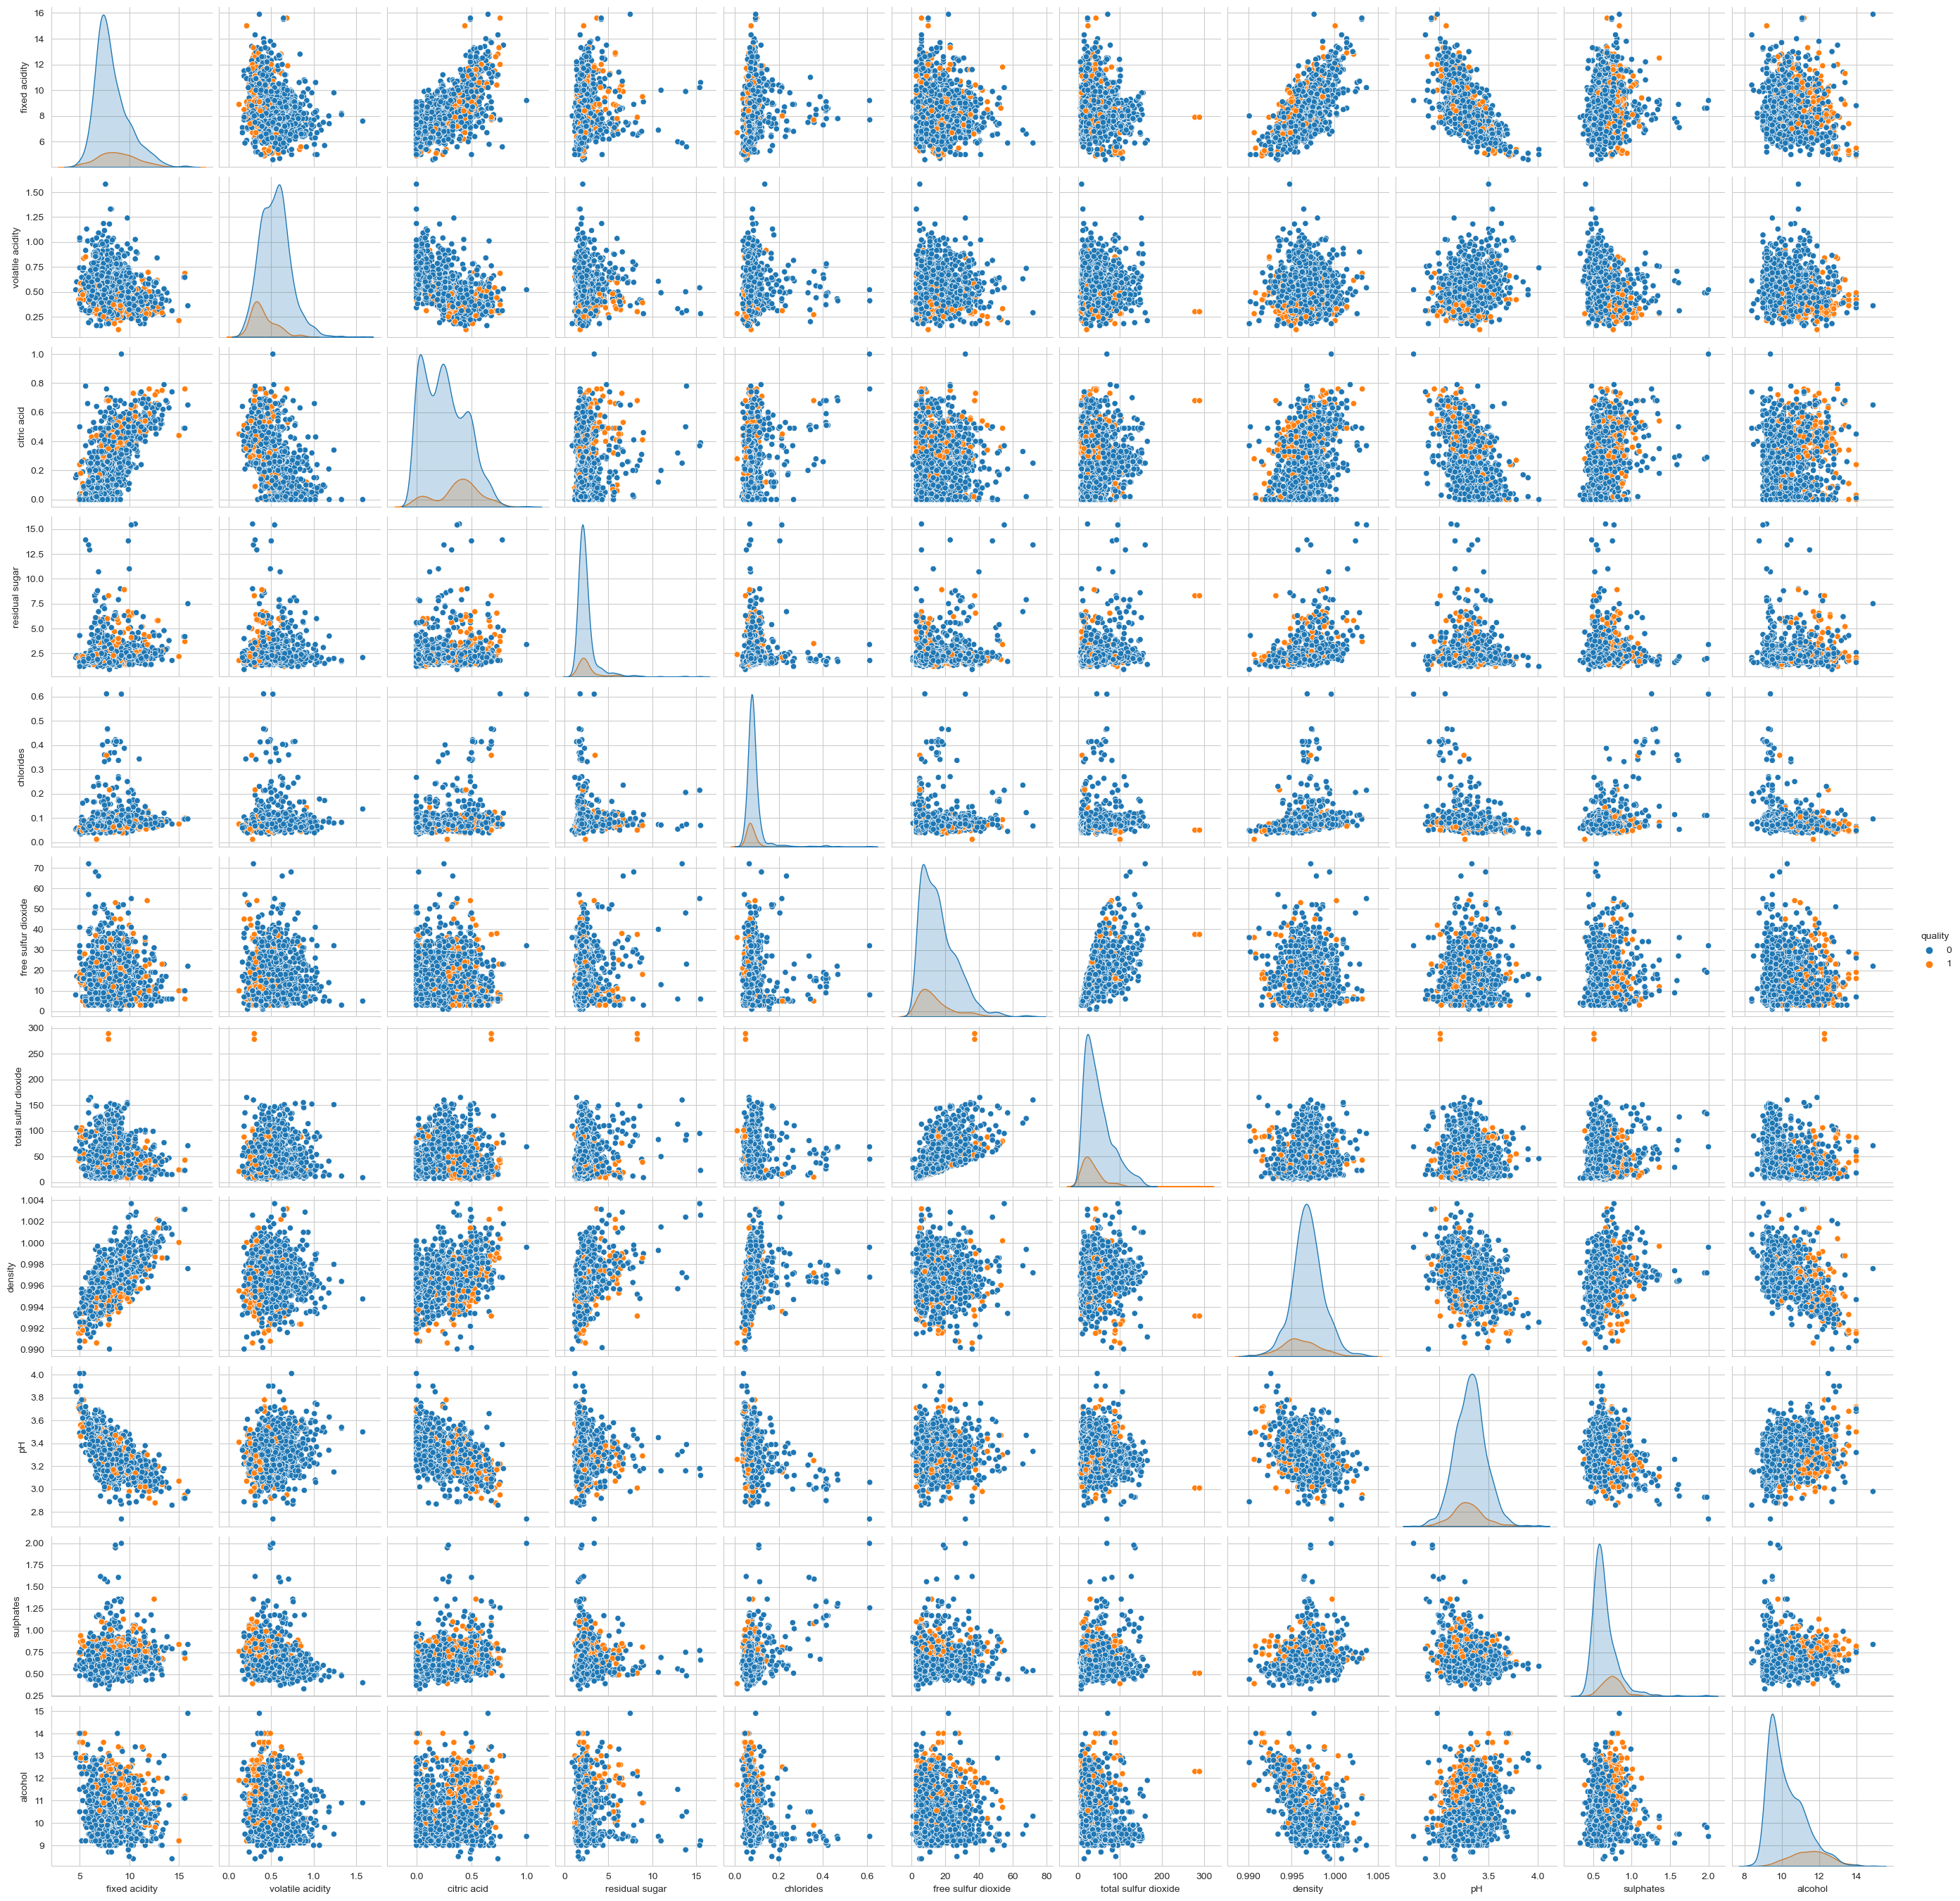

In [8]:
sns.pairplot(wine_df, hue="quality")
plt.show()

### Splitting Dependent and Independent Variables

In [9]:
X = wine_df.iloc[:, :-1].values
y = wine_df.iloc[:, -1].values

### Splitting of Dataset into Test and Train

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
X_train

array([[ 8.4  ,  0.745,  0.11 , ...,  3.19 ,  0.82 ,  9.6  ],
       [ 7.6  ,  0.43 ,  0.29 , ...,  3.4  ,  0.64 ,  9.5  ],
       [ 8.4  ,  0.56 ,  0.04 , ...,  3.22 ,  0.44 ,  9.6  ],
       ...,
       [ 7.9  ,  0.57 ,  0.31 , ...,  3.29 ,  0.69 ,  9.5  ],
       [13.   ,  0.47 ,  0.49 , ...,  3.3  ,  0.68 , 12.7  ],
       [ 9.8  ,  0.98 ,  0.32 , ...,  3.25 ,  0.48 ,  9.4  ]])

In [12]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

### Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_train = MMS.fit_transform(X=X_train)
X_test = MMS.fit_transform(X_test)

In [14]:
X_train

array([[0.33035714, 0.42808219, 0.11      , ..., 0.35433071, 0.27607362,
        0.18461538],
       [0.25892857, 0.21232877, 0.29      , ..., 0.51968504, 0.16564417,
        0.16923077],
       [0.33035714, 0.30136986, 0.04      , ..., 0.37795276, 0.04294479,
        0.18461538],
       ...,
       [0.28571429, 0.30821918, 0.31      , ..., 0.43307087, 0.19631902,
        0.16923077],
       [0.74107143, 0.23972603, 0.49      , ..., 0.44094488, 0.19018405,
        0.66153846],
       [0.45535714, 0.5890411 , 0.32      , ..., 0.4015748 , 0.06748466,
        0.15384615]])

In [15]:
X_test

array([[0.56363636, 0.35227273, 0.5443038 , ..., 0.28431373, 0.42574257,
        0.42857143],
       [0.31818182, 0.75      , 0.        , ..., 0.47058824, 0.1980198 ,
        0.21428571],
       [0.40909091, 0.14772727, 0.41772152, ..., 0.37254902, 0.5049505 ,
        0.58928571],
       ...,
       [0.24545455, 0.23295455, 0.62025316, ..., 0.47058824, 0.44554455,
        0.46428571],
       [1.        , 0.59659091, 0.96202532, ..., 0.06862745, 0.34653465,
        0.5       ],
       [0.27272727, 0.30681818, 0.36708861, ..., 0.50980392, 0.30693069,
        0.19642857]])

In [16]:
unique_val, counts = np.unique(y_train, return_counts=True)
for i in range(len(unique_val)):
    print(unique_val[i], " -> ", counts[i])

0  ->  1027
1  ->  172


### Building the Regressor

In [21]:
from sklearn.linear_model import LogisticRegression
Regressor = LogisticRegression(solver="saga", penalty=None)
Regressor.fit(X_train, y_train)

/Users/ramnaresh/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='saga')

In [22]:
y_predicted_category = Regressor.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_category)
accuracy = accuracy_score(y_true=y_test, y_pred=y_predicted_category)
precision = precision_score(y_true=y_test, y_pred=y_predicted_category)
recall = recall_score(y_true=y_test, y_pred=y_predicted_category)
print(matrix)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall", recall)

[[319  36]
 [ 23  22]]
Accuracy:  0.8525
Precision:  0.3793103448275862
Recall 0.4888888888888889
